### importing important packages

In [1]:
# importing important packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### importing dataset

In [2]:
# importing dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\Data (1).csv")

In [3]:
df.head(10)

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,Non Sarcastic
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",Sarcastic
2,New Emails Reveal Warm Relationship Between Ka...,Non Sarcastic
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,Non Sarcastic
4,God Urges Rick Perry Not To Run For President,Sarcastic
5,Global Aid Pours into Haiti,Non Sarcastic
6,CNN Anchor Calls Obama Protester 'Rude' And 'C...,Non Sarcastic
7,Federal Prisons Reinstitute Executions By Leth...,Sarcastic
8,Lou Dobbs Crumbles When Pressed On His 'NAFTA ...,Non Sarcastic
9,CNN Still Bent On Debating 'Two Sides' Of The ...,Non Sarcastic


In [4]:
df.shape

(12506, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12506 entries, 0 to 12505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  12506 non-null  object
 1   target     12506 non-null  object
dtypes: object(2)
memory usage: 195.5+ KB


### Missing values imputation

In [6]:
# missing values 
df.isnull().sum()

headlines    0
target       0
dtype: int64

### Duplicated values

In [7]:
# duplicated values
df.duplicated().sum()

0

### Label encoder

In [8]:
# labels encoder to convert target columns into numarical columns
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['target'] = lb.fit_transform(df['target'])

In [9]:
df['target'] 

0        0
1        1
2        0
3        0
4        1
        ..
12501    0
12502    1
12503    1
12504    0
12505    1
Name: target, Length: 12506, dtype: int32

In [10]:
df.head()

,headlines,target
0,CNN Triumphs (At Least in Most Demographic Cat...,0
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",1
2,New Emails Reveal Warm Relationship Between Ka...,0
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,0
4,God Urges Rick Perry Not To Run For President,1


### Renaming columns names

In [11]:
df.rename(columns={'headlines':'text','target':'target'},inplace=True)

In [12]:
df.head()

,text,target
0,CNN Triumphs (At Least in Most Demographic Cat...,0
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",1
2,New Emails Reveal Warm Relationship Between Ka...,0
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,0
4,God Urges Rick Perry Not To Run For President,1


### values counts of target colm

In [13]:
df['target'].value_counts()

0    6531
1    5975
Name: target, dtype: int64

In [14]:
# importing nltk packege
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### 3.Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [15]:
df.head(4)

,text,target
0,CNN Triumphs (At Least in Most Demographic Cat...,0
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",1
2,New Emails Reveal Warm Relationship Between Ka...,0
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,0


In [16]:
df['text'][2]

'New Emails Reveal Warm Relationship Between Kamala Harris And Big Tech'

### steming package 

In [17]:
# for stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

### punctuation 

In [18]:
# punctuation labrary to remove punctuations in santeces
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### stopwords 

In [19]:
from nltk.corpus import stopwords
stopworld = stopwords.words('english')

In [20]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [21]:
transform_text('New 23 Emails Reveal Warm Relationship Between Kamala Harris And Big Tech')

'new 23 email reveal warm relationship kamala harri big tech'

### applying above coad on whole data

In [22]:
# above coad apply on our whole data
df['transform_text'] = df['text'].apply(transform_text)

In [23]:
df.head(10)

,text,target,transform_text
0,CNN Triumphs (At Least in Most Demographic Cat...,0,cnn triumph least demograph categori
1,"‘You Did The Best You Could,’ Says Iron Man Ac...",1,best could say iron man action figur voic desp...
2,New Emails Reveal Warm Relationship Between Ka...,0,new email reveal warm relationship kamala harr...
3,Donald Trump Jr. Gets Slammed Over Racist Birt...,0,donald trump get slam racist birther bot attac...
4,God Urges Rick Perry Not To Run For President,1,god urg rick perri run presid
5,Global Aid Pours into Haiti,0,global aid pour haiti
6,CNN Anchor Calls Obama Protester 'Rude' And 'C...,0,cnn anchor call obama protest
7,Federal Prisons Reinstitute Executions By Leth...,1,feder prison reinstitut execut lethal inflat
8,Lou Dobbs Crumbles When Pressed On His 'NAFTA ...,0,lou dobb crumbl press super highway myth
9,CNN Still Bent On Debating 'Two Sides' Of The ...,0,cnn still bent debat side confederaci


In [24]:
df = df[['target','transform_text']]

In [25]:
df.head(10)

,target,transform_text
0,0,cnn triumph least demograph categori
1,1,best could say iron man action figur voic desp...
2,0,new email reveal warm relationship kamala harr...
3,0,donald trump get slam racist birther bot attac...
4,1,god urg rick perri run presid
5,0,global aid pour haiti
6,0,cnn anchor call obama protest
7,1,feder prison reinstitut execut lethal inflat
8,0,lou dobb crumbl press super highway myth
9,0,cnn still bent debat side confederaci


### converting text into numaric form

In [26]:
# converting this text into numarical form 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [27]:
X = cv.fit_transform(df['transform_text']).toarray()

In [28]:
y = df['target'].values

In [29]:
X.shape,y.shape

((12506, 11585), (12506,))

### train test split

In [30]:
# train test split :
from sklearn.model_selection import train_test_split
X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X_train.shape , X_test.shape

((10004, 11585), (2502, 11585))

In [32]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
metric_df = pd.DataFrame(columns=['Model','accuracy','precision','recall','fi_score'])
metric_df

,Model,accuracy,precision,recall,fi_score


In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 1.naive_bayes

In [47]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print('accuracy_score :',metrics.accuracy_score(y_test,y_pred))
print('precision_score :',metrics.precision_score(y_test,y_pred))
print("Recall : ",metrics.recall_score(y_test,y_pred))
print('f1_score :',metrics.f1_score(y_test,y_pred))

accuracy_score : 0.7266187050359713
precision_score : 0.8064118372379778
Recall :  0.5537679932260796
f1_score : 0.6566265060240963


In [48]:
metric_df.loc[len(metric_df)] = (['Naive Bayes',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


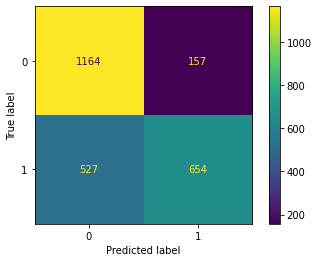

In [51]:
metrics.plot_confusion_matrix(gnb,X_test,y_test)

### 2.MultinomialNB

In [52]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_2=mnb.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.7266187050359713
precision_score : 0.8064118372379778
Recall :  0.5537679932260796
f1_score : 0.6566265060240963


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


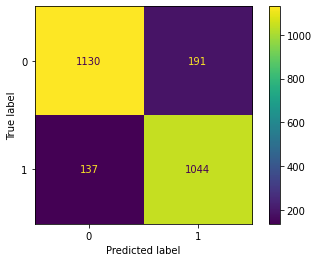

In [53]:
metrics.plot_confusion_matrix(mnb,X_test,y_test)

In [54]:
metric_df.loc[len(metric_df)] = (['MultinomialNB',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627


### 3.BernoulliNB

In [55]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_3=bnb.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.7266187050359713
precision_score : 0.8064118372379778
Recall :  0.5537679932260796
f1_score : 0.6566265060240963


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


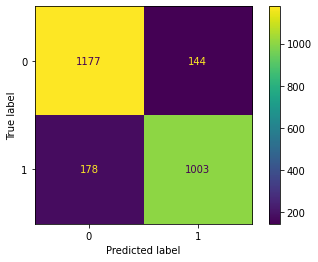

In [56]:
metrics.plot_confusion_matrix(bnb,X_test,y_test)

In [57]:
metric_df.loc[len(metric_df)] = (['BernoulliNB',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627


In [38]:
!pip install xgboost

### 4.Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.8645083932853717
precision_score : 0.8473597359735974
Recall :  0.869602032176122
f1_score : 0.8583368157124949


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


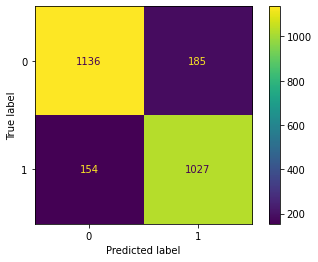

In [59]:
metrics.plot_confusion_matrix(lg,X_test,y_test)

In [63]:
metric_df.loc[len(metric_df)] = (['Log_regression',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627


### 5.SVM

In [66]:
from sklearn.svm import SVC
svc = LogisticRegression()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.8645083932853717
precision_score : 0.8473597359735974
Recall :  0.869602032176122
f1_score : 0.8583368157124949


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


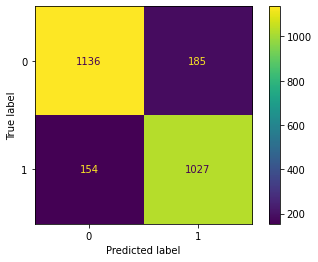

In [67]:
metrics.plot_confusion_matrix(svc,X_test,y_test)

In [68]:
metric_df.loc[len(metric_df)] = (['svc',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627
4,svc,0.864508,0.847360,0.869602,0.858337


### 6.Decision tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.8089528377298162
precision_score : 0.8102383053839365
Recall :  0.777307366638442
f1_score : 0.7934312878133103


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


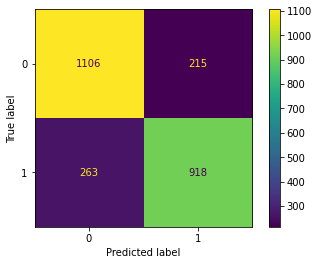

In [72]:
metrics.plot_confusion_matrix(dt,X_test,y_test)

In [73]:
metric_df.loc[len(metric_df)] = (['D_Tree',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627
4,svc,0.864508,0.847360,0.869602,0.858337
5,D_Tree,0.808953,0.810238,0.777307,0.793431


### 7.KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.5511590727418065
precision_score : 0.967741935483871
Recall :  0.05080440304826418
f1_score : 0.09654062751407884


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


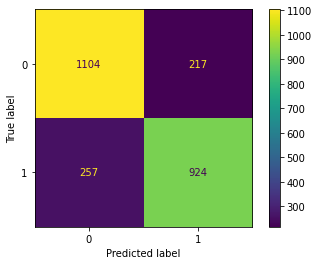

In [75]:
metrics.plot_confusion_matrix(knn,X_test,y_test)

In [76]:
metric_df.loc[len(metric_df)] = (['knn',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627
4,svc,0.864508,0.847360,0.869602,0.858337
5,D_Tree,0.808953,0.810238,0.777307,0.793431
6,knn,0.810552,0.809816,0.782388,0.795866


### 8.Random forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.8353317346123101
precision_score : 0.8658420551855376
Recall :  0.7705334462320068
f1_score : 0.8154121863799283


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


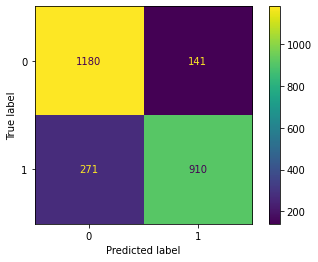

In [82]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [83]:
metric_df.loc[len(metric_df)] = (['r_forest',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627
4,svc,0.864508,0.847360,0.869602,0.858337
5,D_Tree,0.808953,0.810238,0.777307,0.793431
6,knn,0.810552,0.809816,0.782388,0.795866
7,r_forest,0.835731,0.868069,0.768840,0.815447
8,r_forest,0.835332,0.865842,0.770533,0.815412


### 9.Adaboost

In [84]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.7569944044764189
precision_score : 0.6694263749260793
Recall :  0.9585097375105842
f1_score : 0.7883008356545961


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


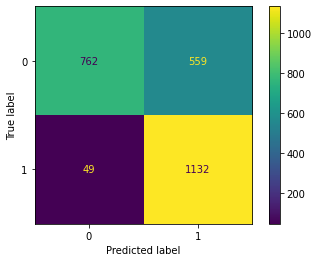

In [85]:
metrics.plot_confusion_matrix(adb,X_test,y_test)

In [86]:
metric_df.loc[len(metric_df)] = (['adaboost',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627
4,svc,0.864508,0.847360,0.869602,0.858337
5,D_Tree,0.808953,0.810238,0.777307,0.793431
6,knn,0.810552,0.809816,0.782388,0.795866
7,r_forest,0.835731,0.868069,0.768840,0.815447
8,r_forest,0.835332,0.865842,0.770533,0.815412
9,adaboost,0.756994,0.669426,0.958510,0.788301


### 10.XGBoost

In [98]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.8057553956834532
precision_score : 0.7333781061114842
Recall :  0.9246401354784082
f1_score : 0.8179775280898877


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


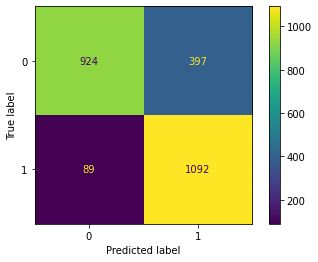

In [99]:
metrics.plot_confusion_matrix(xgb,X_test,y_test)

In [100]:
metric_df.loc[len(metric_df)] = (['xgboost',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627
4,svc,0.864508,0.847360,0.869602,0.858337
5,D_Tree,0.808953,0.810238,0.777307,0.793431
6,knn,0.810552,0.809816,0.782388,0.795866
7,r_forest,0.835731,0.868069,0.768840,0.815447
8,r_forest,0.835332,0.865842,0.770533,0.815412
9,adaboost,0.756994,0.669426,0.958510,0.788301


### 11.GradianBoosting 

In [101]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)

In [102]:
print('accuracy_score :',accuracy_score(y_test,y_pred))
print('precision_score :',precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print('f1_score :',f1_score(y_test,y_pred))

accuracy_score : 0.7649880095923262
precision_score : 0.6785069235400362
Recall :  0.9542760372565622
f1_score : 0.793103448275862


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


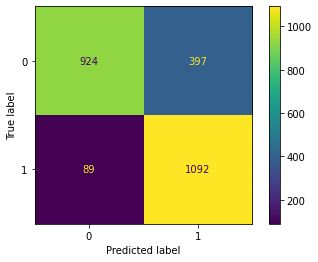

In [103]:
metrics.plot_confusion_matrix(xgb,X_test,y_test)

In [104]:
metric_df.loc[len(metric_df)] = (['xgboost',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,accuracy,precision,recall,fi_score
0,Naive Bayes,0.726619,0.806412,0.553768,0.656627
1,MultinomialNB,0.726619,0.806412,0.553768,0.656627
2,BernoulliNB,0.726619,0.806412,0.553768,0.656627
3,Log_regression,0.726619,0.806412,0.553768,0.656627
4,svc,0.864508,0.847360,0.869602,0.858337
5,D_Tree,0.808953,0.810238,0.777307,0.793431
6,knn,0.810552,0.809816,0.782388,0.795866
7,r_forest,0.835731,0.868069,0.768840,0.815447
8,r_forest,0.835332,0.865842,0.770533,0.815412
9,adaboost,0.756994,0.669426,0.958510,0.788301
